In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import os
import time

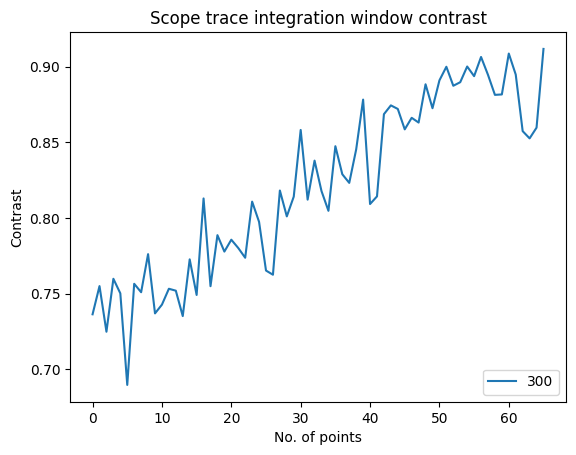

0.6897596236320572 5


In [8]:
fname="/Users/dylankawashiri/Downloads/davies_afterI" #input pathname for folder
asd=1 #user input represents the index # of the waveform data
def graphs(userinput,foldername):
    num=str(userinput) #converts index number to string
    filename=foldername + "/" + num +"_wav.dat" #creates string for pathname of file
    data=pd.read_csv(filename, sep = ',').to_numpy() #reads data
    datay=np.delete(data,0,1) #deletes first column
    datax=np.delete(data,1,1) #deletes second column
    plt.plot(datax,datay)
    
#graphs(asd,fname)

foldername=fname
integrationwindow=300 
start=2000 #starting point
    #USER VARS
initial_count = 0
dir = foldername
for path in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, path)):
        initial_count += 1
num_of_dat=initial_count #input the number of .dat files that are going to be analyzed
num_of_peaks=2
num_of_arrays=1
int_gaps=integrationwindow

#VARS - DO NOT CHANGE
array=np.zeros([num_of_peaks,num_of_dat])
for i in range(0,num_of_arrays-1):
    array=np.append(array,np.zeros([num_of_peaks,num_of_dat]),0)

#SUMS
for i in range(1,num_of_dat+1):

    #OFFSET VALUE BETWEEN PEAKS
    offset_val=int(round(((209.46+0.1+0.5*(i-1))/.0032),0))+start #finds offset, rounds and converts to int

    sums=np.zeros([num_of_peaks*num_of_arrays,1])
    filename="/Users/dylankawashiri/Downloads/davies_afterI/"+str(i)+"_wav.dat"
    data=pd.read_csv(filename, sep = ',').to_numpy() #if .CSV or .DAT separated by a non space value
    count=0
    for j in range(0,num_of_arrays):
        for k in range(start-1,start-1+int_gaps):
            sums[count]=sums[count]+float(data[k][1])
        #print(sums[count])
        count+=1
        for l in range(offset_val,offset_val+int_gaps):
            sums[count]=sums[count]+float(data[l][1])
        count+=1
    for m in range(0,num_of_arrays*num_of_peaks):
        array[m][i-1]=sums[m]
        #print(array[m][i-1])

#CONTRAST
newarr=np.zeros([1,num_of_dat])
for i in range(0,num_of_arrays-1):
    newarr=np.append(newarr,np.zeros([1,num_of_dat]),0)
count=0
for i in range(0,num_of_arrays):
    for j in range(0,num_of_dat): 
        newarr[i][j]=array[count][j]/array[count+1][j]
    count+=2

#GRAPHING
for i in range(0,num_of_arrays):
    plt.plot(newarr[i],label=int_gaps)
plt.title("Scope trace integration window contrast");
plt.ylabel("Contrast");
plt.xlabel("No. of points");
plt.legend(loc="lower right")
plt.show()

val=1
index=0
for i in range(0,np.size(newarr)):
    if newarr[0][i]<val:
        val=newarr[0][i]
        index=i
print(val,index) 
    
#contrast_calc(fname,300,2000)